In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import string
import re 
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk import *

plt.style.use('fivethirtyeight')

In [4]:
#change this to your relevnt directory
os.chdir('C:\\Users\\Cafral\\Desktop\\kaggle\\CORD-19-research-challenge\\data_v7\\')

xls = pd.ExcelFile('Risk Output Summaries.xlsx')
age = pd.read_excel(xls, 'Age')
heart_risk = pd.read_excel(xls, 'heart risk')
pollution = pd.read_excel(xls, 'Pollution')
population_density = pd.read_excel(xls, 'Population Density')
humidity = pd.read_excel(xls, 'Humidity')
temperature = pd.read_excel(xls, 'Temperature')

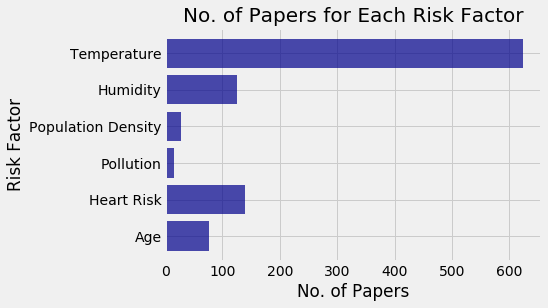

In [6]:
df_list =[age,heart_risk,pollution,population_density,humidity,temperature]
df_name = ['Age','Heart Risk','Pollution','Population Density','Humidity','Temperature']

i = 0
for dataframe in df_list:
    plt.barh(df_name[i],len(dataframe),color='darkblue',alpha=0.7)
    plt.title('No. of Papers for Each Risk Factor',size = 20)
    plt.xlabel('No. of Papers')
    plt.ylabel('Risk Factor')
    i =i +1
plt.savefig('summary_1.png',bbox_inches='tight')
plt.show()


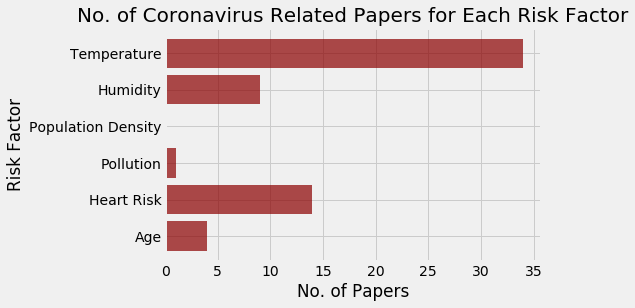

In [7]:
df_list =[age,heart_risk,pollution,population_density,humidity,temperature]
df_name = ['Age','Heart Risk','Pollution','Population Density','Humidity','Temperature']

i = 0
for dataframe in df_list:
    #plt.barh(df_name[i],len(dataframe),color='darkblue',alpha=0.7)
    plt.barh(df_name[i],len(dataframe['Coronavirus Sentence'][
        dataframe['Coronavirus Sentence'].isna()==False]),color='darkred',alpha=0.7)
    plt.title('No. of Coronavirus Related Papers for Each Risk Factor',size = 20)
    plt.xlabel('No. of Papers')
    plt.ylabel('Risk Factor')
    #plt.legend(['Total No. of Papers','No. of Coronavirus Related Papers'])
    i =i +1

plt.savefig('summary_2.png',bbox_inches='tight')
plt.show()


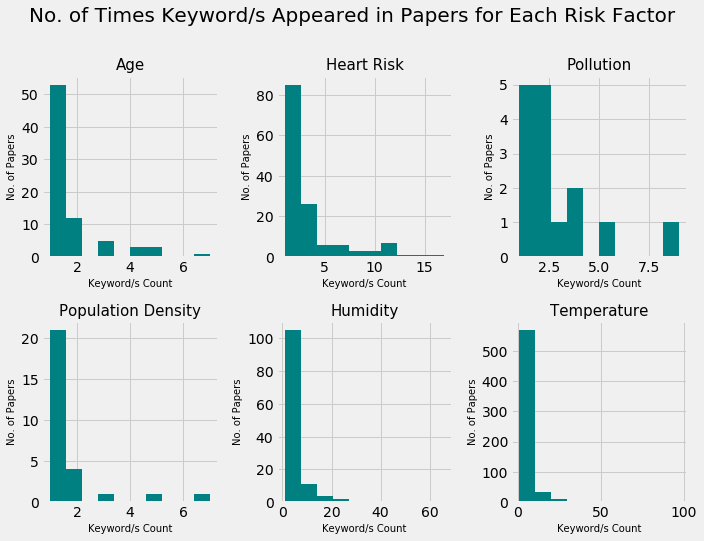

In [8]:
f = plt.figure(figsize=(10,10))
f.suptitle('No. of Times Keyword/s Appeared in Papers for Each Risk Factor',y=1.05, size = 20)
i =0 
y = 1
for dataframe in df_list:
    axis = f.add_subplot(3,3,y)
    axis.hist(dataframe['Num Occurrences'],color='teal')
    axis.set_title(df_name[i],size =15)
    axis.set_xlabel('Keyword/s Count',size=10)
    axis.set_ylabel('No. of Papers',size=10)
    
    y = y+1
    i =i +1

plt.tight_layout()
plt.savefig('summary_3.png',bbox_inches='tight')
plt.show()


In [296]:
def vocabulary_counter(dataFrame):
    vocab = Counter()
    for idx_num,row in dataFrame.iterrows():
        wordCount = 0
        tokens = row['Keyword'].split(',')
        vocab.update(tokens)
        
    return vocab

In [297]:
import matplotlib as mpl
def plotDescStats(df,risk_factor):
    df['Keyword'] = df['Keyword'].str.replace('\[','')
    df['Keyword'] = df['Keyword'].str.replace('\]','')
    df['Keyword'] = df['Keyword'].str.replace('\'','')
    
    vocab_keywords = vocabulary_counter(df)
    vocab_keywords_df = pd.DataFrame(vocab_keywords.most_common(),columns=['Keyword','Count'])
    
    # Create directory
    dirName = f'C:\\Users\\Cafral\\Desktop\\kaggle\\CORD-19-research-challenge\\data_v7\\{risk_factor}'
    
    try:
        # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")
        
    os.chdir(dirName)
    
    #with mpl.rc_context({'figure.dpi': 300}):
    fig = plt.subplots(figsize=(6,10))
    plt.barh(vocab_keywords_df['Keyword'],(vocab_keywords_df['Count']),color='darkblue',alpha=0.7)
    plt.xticks(rotation=90)
    plt.title(f'Keyword Count : {risk_factor}') 
    plt.xlabel('Count')
    plt.ylabel('Keyword')
    plt.savefig(f'{risk_factor}_keyword_density.png',bbox_inches='tight')
    plt.show()

    plt.hist(df['Num Occurrences'],alpha=0.6)
    plt.title(f'Keyword Density: {risk_factor}')
    plt.xlabel('No. of Times Keyword/s Appeared in Papers')
    plt.ylabel('No.of Papers')    
    plt.savefig(f'{risk_factor}_keyword_count.png',bbox_inches='tight')
    plt.show()
    

    vd = venn2(subsets = (len(df['Title'].values),0,
                          len(df['Title'][df['Coronavirus Sentence'].isna()==False].values)), 
               set_labels = ('All Risk Factor Papers','Papers with Coronavirus'),
               set_colors=('purple', 'skyblue'), alpha = 0.7)
    vd.get_label_by_id("01").set_visible(False)
    plt.title(f'No. of Risk Factor Papers Mentioning Coronavirus:{risk_factor}')
    plt.savefig(f'{risk_factor}_coronavirus_occurance.png',bbox_inches='tight')
    plt.show()

Directory  C:\Users\Cafral\Desktop\kaggle\CORD-19-research-challenge\data_v7\Age  already exists


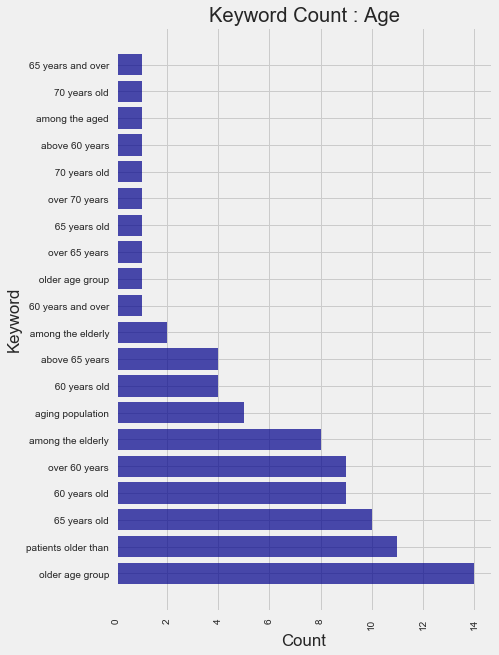

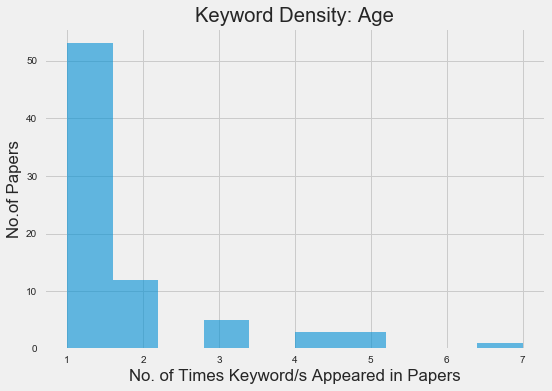

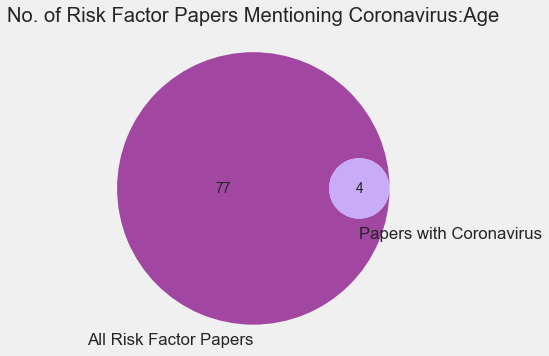

Directory  C:\Users\Cafral\Desktop\kaggle\CORD-19-research-challenge\data_v7\Heart Risk  already exists


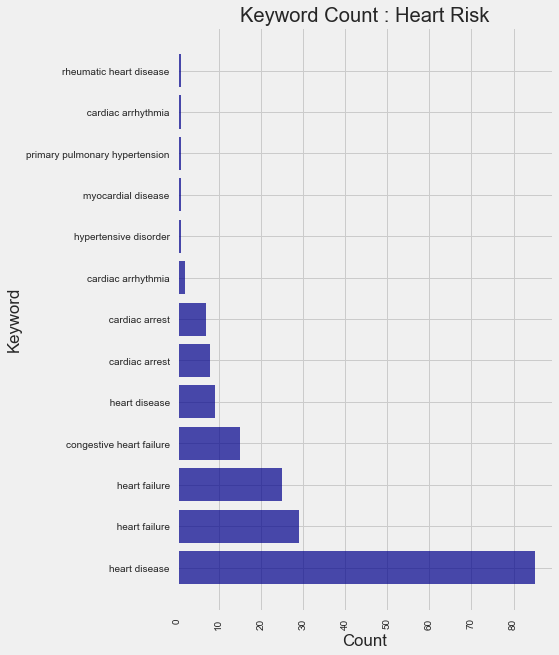

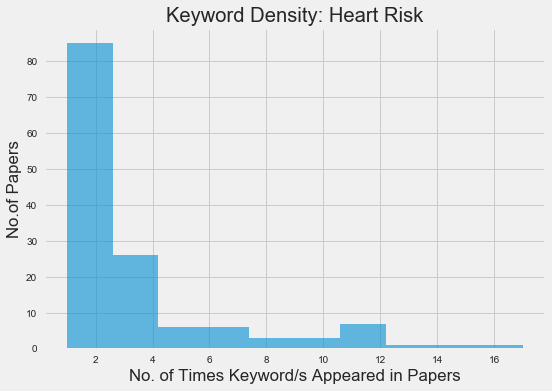

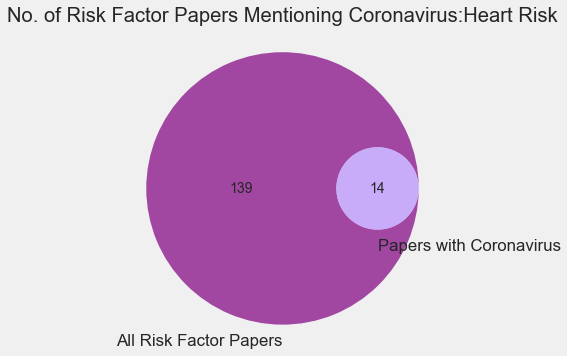

Directory  C:\Users\Cafral\Desktop\kaggle\CORD-19-research-challenge\data_v7\Pollution  Created 


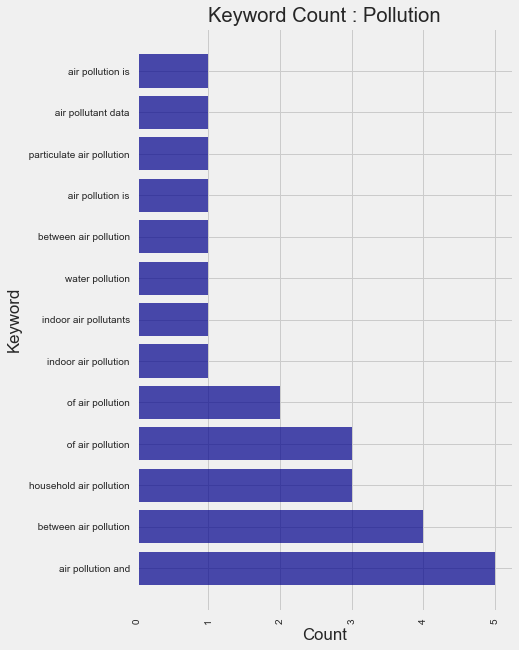

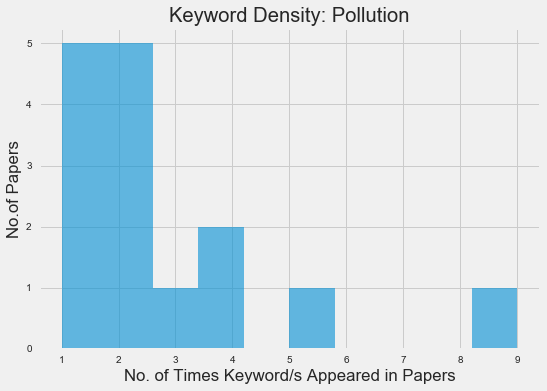

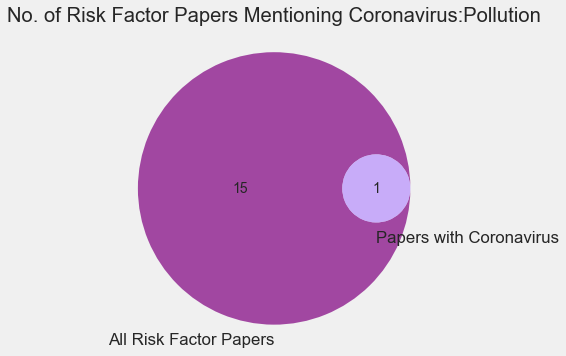

Directory  C:\Users\Cafral\Desktop\kaggle\CORD-19-research-challenge\data_v7\Population Density  Created 


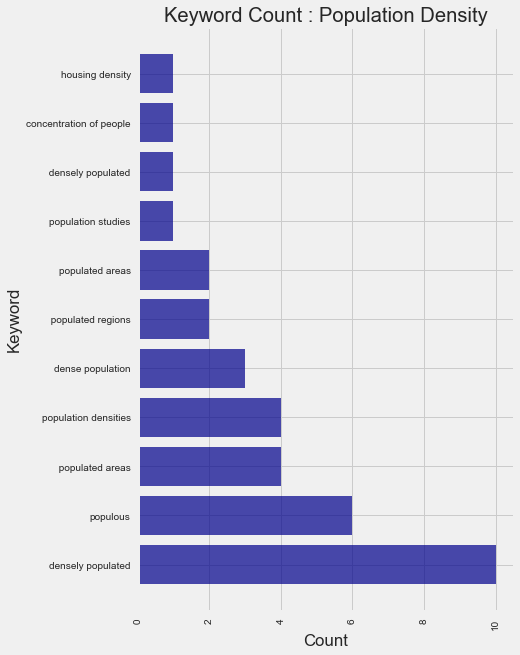

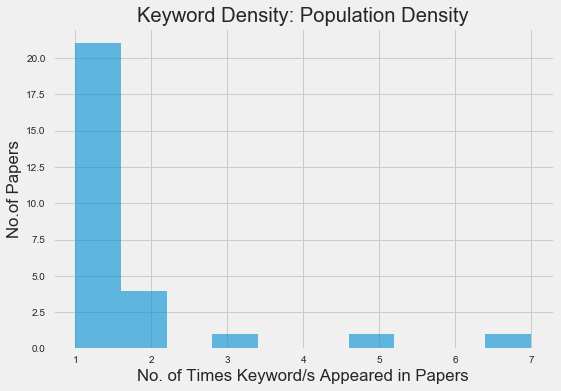

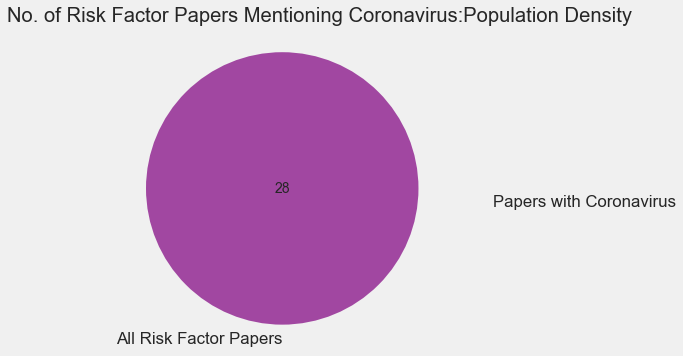

Directory  C:\Users\Cafral\Desktop\kaggle\CORD-19-research-challenge\data_v7\Humidity  Created 


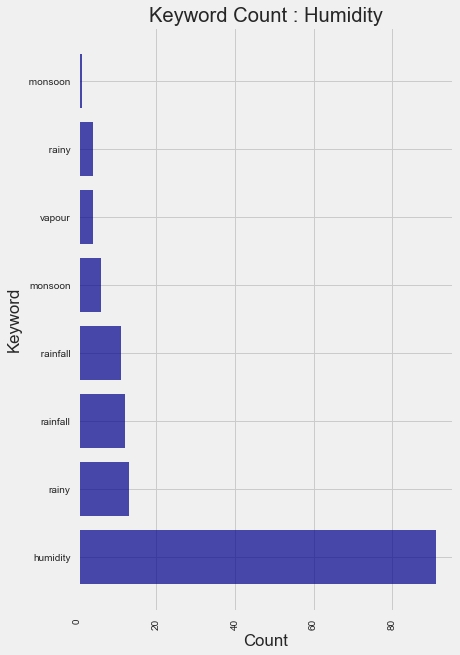

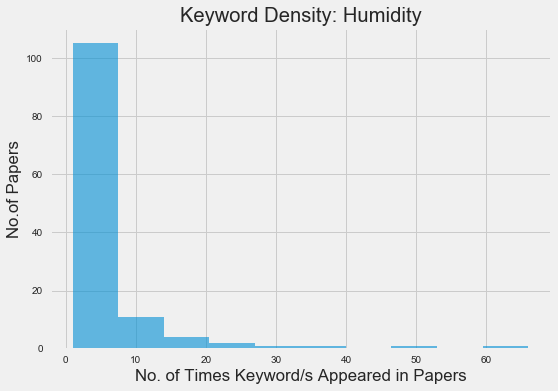

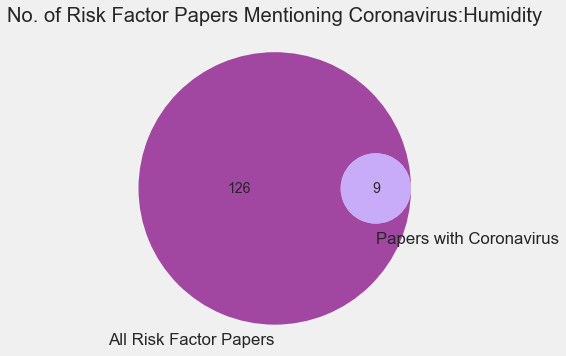

Directory  C:\Users\Cafral\Desktop\kaggle\CORD-19-research-challenge\data_v7\Temperature  Created 


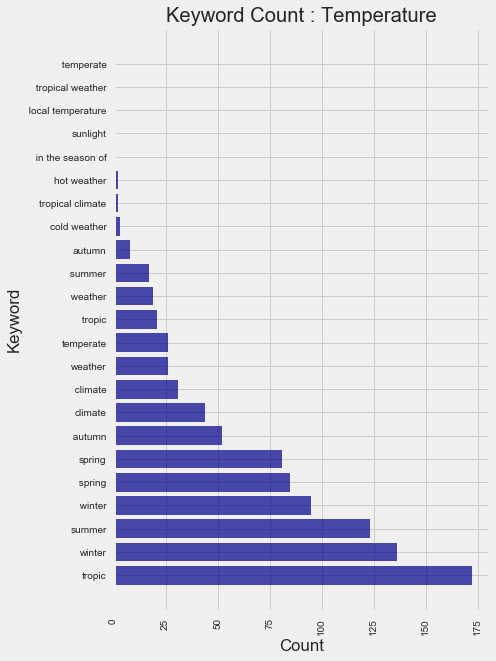

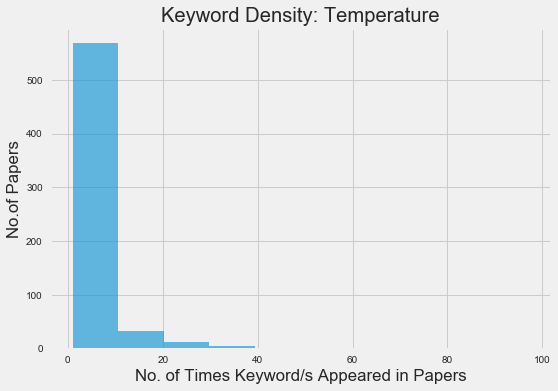

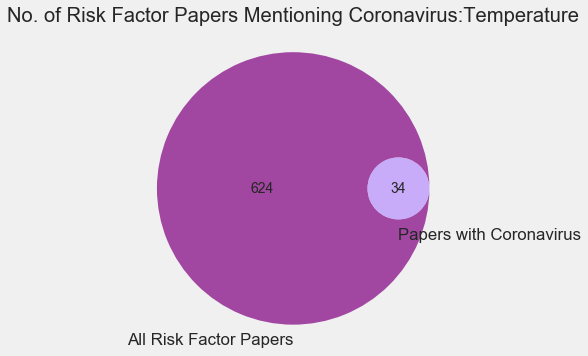

In [298]:
df_list =[age,heart_risk,pollution,population_density,humidity,temperature]
df_name = ['Age','Heart Risk','Pollution','Population Density','Humidity','Temperature']
i = 0
for dataframe in df_list:
    plotDescStats(dataframe,df_name[i])
    i = i+1